---
# Cairo University Faculty of Engineering
## Machine Learning 
## Assignment 6

---
Please write your full name here
- **Name** : "Ahmed Emad Eldeen Ahmed"

# Part 1 PCA

In [51]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline


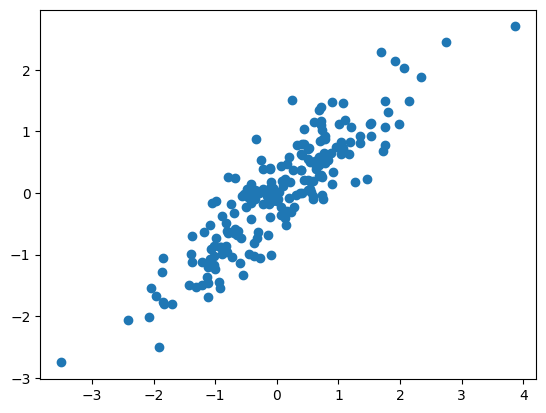

In [52]:
rng = np.random.RandomState(42)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

## Question 1

Write your own PCA function that will return:
* The sorted eigenvectors of all principal components
* The corresponding eigenvalues
* The transformed data
- Function takes in the data only
    - You can use np.linalg.eig

Note, please make sure that the data is centered before transformation (i.e., the sample
mean subtracted out) but not normalized.

In [53]:
import numpy as np

def pca(X):
    # center the data
    X_centered = X - np.mean(X, axis=0)

    # calculate the covariance matrix
    cov_matrix = np.cov(X_centered.T)

    # calculate the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # sort the eigenvectors by decreasing eigenvalues
    sorted_indices = eigenvalues.argsort()[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # sort the eigenvalues in the same order as the eigenvectors
    sorted_eigenvalues = eigenvalues[sorted_indices]

    # transform the data using the sorted eigenvectors
    X_transformed = np.dot(X_centered, sorted_eigenvectors)

    return sorted_eigenvectors, sorted_eigenvalues, X_transformed


## Question 2
- Apply your PCA function to the data given above
- print the pca eigenvalues
- plot the transformed data
- plot the PCA vectors over the ORIGINAL data

In [54]:
## Apply your function
sorted_eigenvectors, sorted_eigenvalues, X_transformed = pca(X) 

In [55]:
print("Eigenvalues are: ", sorted_eigenvalues)

Eigenvalues are:  [1.82927343 0.10246373]


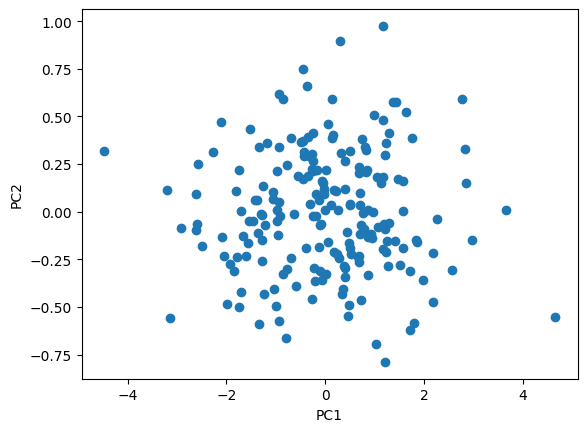

In [56]:
### Plot transformed data
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

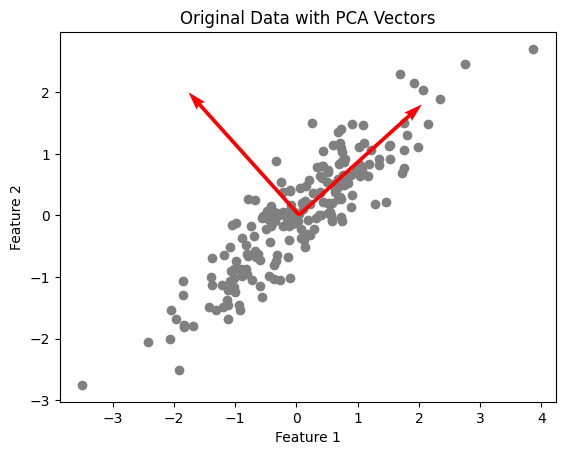

In [57]:
plt.scatter(X[:, 0], X[:, 1], color='gray')
plt.quiver(np.mean(X[:, 0]), np.mean(X[:, 1]), sorted_eigenvectors[0, 0], sorted_eigenvectors[1, 0], color='red', scale=3)
plt.quiver(np.mean(X[:, 0]), np.mean(X[:, 1]), sorted_eigenvectors[0, 1], sorted_eigenvectors[1, 1], color='red', scale=3)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data with PCA Vectors')
plt.show()

## Question 3

- Apply sklearn's PCA function to the same data
- print the pca eigenvalues

In [58]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)
print(pca.explained_variance_)


[1.82927343 0.10246373]


## Question 4
- Appl sklearn PCA using 1 component only
- print shape of transformed data
- plot the transformed data

(200, 1)


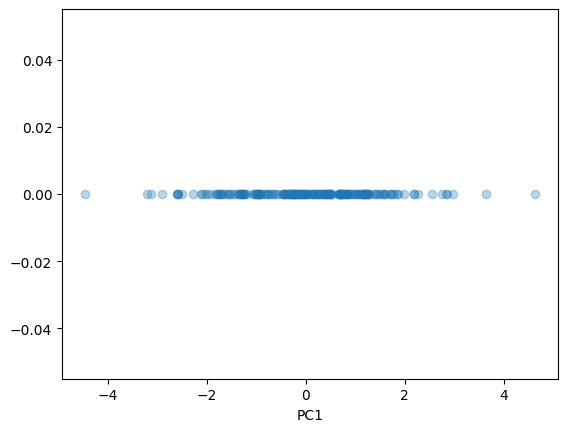

In [59]:
pca = PCA(n_components=1)

X_transformed = pca.fit_transform(X)

print(X_transformed.shape)

plt.scatter(X_transformed, np.zeros_like(X_transformed), alpha=0.3)
plt.xlabel('PC1')
plt.show()


# Part 2 SVM

### Use the following function to plot the classification regions

In [60]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # np.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Use the following dataset in questions 1, 2, and 3.

In [61]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

#### Question 1
Split the data into training and testing datasets (use random_state=42 and 20% of the data for testing)

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Question 2
1. Train an SVM classifier using linear kernel (use SVC)
2. Plot the classification regions using the training dataset.

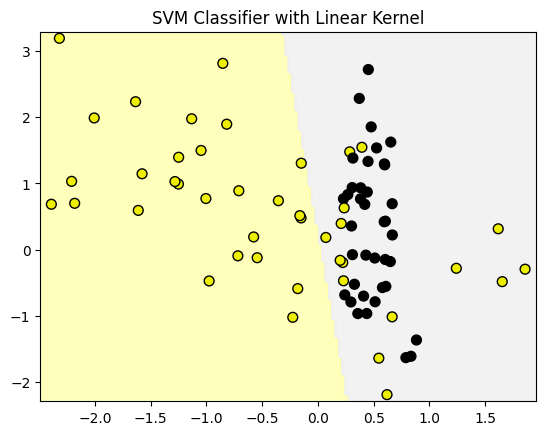

In [63]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

plot_class_regions_for_classifier(svm, X_train, y_train, title='SVM Classifier with Linear Kernel')


#### Question 3
1. Train an SVM classifier using linear kernel with C=0.00002.
2. Train another SVM classifier using linear kernel with C=200
3. Plot the classification regions for both cases using the training dataset.
4. Comment on the results.

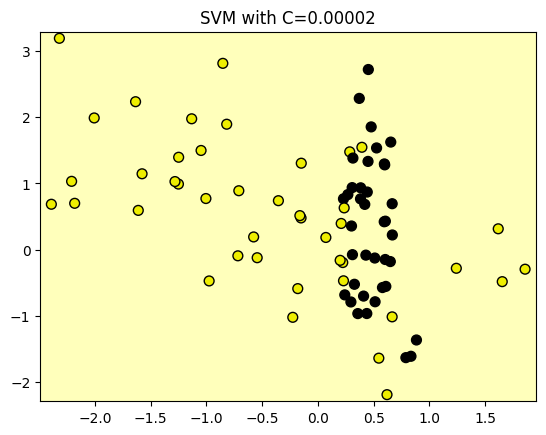

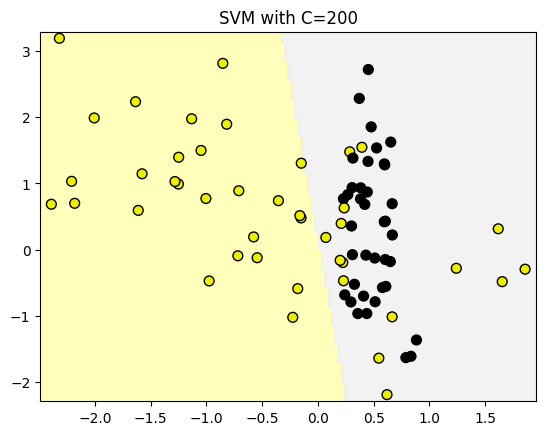

In [64]:
from sklearn.svm import SVC

svm_low_c = SVC(kernel='linear', C=0.00002)
svm_low_c.fit(X_train, y_train)

svm_high_c = SVC(kernel='linear', C=200)
svm_high_c.fit(X_train, y_train)

plot_class_regions_for_classifier(svm_low_c, X_train, y_train, title="SVM with C=0.00002")
plot_class_regions_for_classifier(svm_high_c, X_train, y_train, title="SVM with C=200")


The SVM with a low value of C (C=0.00002) produces a very simple decision boundary that separates the two classes by drawing a line between them. This classifier is highly regularized and doesn't fit the training data well. As a result, it has high bias and low variance.

The SVM with a high value of C (C=200) produces a decision boundary that closely follows the training data, separating the two classes by drawing a more complex curve. This classifier is less regularized and fits the training data very well. As a result, it has low bias and high variance.

### Use the fruits dataset in questions 4, 5, 6.

In [65]:
import pandas as pd
fruits = pd.read_table('fruit_data_with_colors.txt')
feature_names_fruits = ['height', 'width', 'mass', 'color_score']

#### Question 4
1. Split the data by columns into X_fruits and y_fruits where X_fruits is the data records and y_fruits is the labels.
2. Using only the **'height'** and **'width'** features, split the data into training and testing using random_state=42, and 20% of the data for testing.
3. Using **sklearn LinearSVC**, train a linear svm using random_state=42, C=10

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

X_fruits = fruits[['height', 'width']].values
y_fruits = fruits['fruit_label'].values

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=42, test_size=0.2)

svm = LinearSVC(random_state=42, C=10)
svm.fit(X_train, y_train)

C:\Users\ahmad\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=10, random_state=42)

#### Question 5
For the previous model from question 4. 
1. How many SVM models have been trained? and Why?
2. Print the models' coefficients and intercepts.

Only one SVM model has been trained. The reason is that the LinearSVC function trains a single linear SVM model by default.

In [67]:
print("Coefficients:", svm.coef_)
print("Intercept:", svm.intercept_)

Coefficients: [[-0.22459715  0.76048347]
 [-1.70338354  1.18717003]
 [-0.0062549   0.3183943 ]
 [ 1.14746624 -1.71656282]]
Intercept: [-3.42751628  1.46849592 -3.01719598  1.66954999]


#### Question 6
Plot the classification boundary of each svm on a scatter plot of the training data.

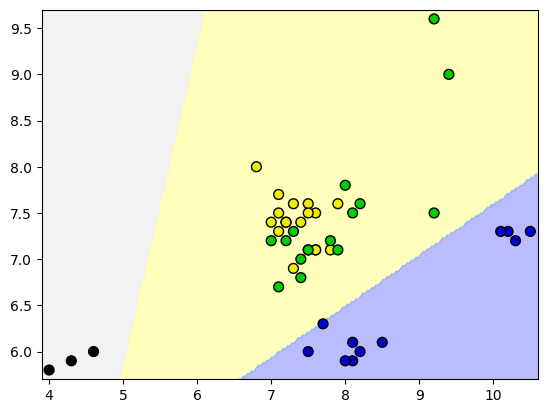

In [68]:
plot_class_regions_for_classifier(svm,X_train,y_train)

In [69]:
from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

#### Question 7
1. Split the dataset into training and testing datasets, use random_state = 42, and 20% of the data for testing.
2. Use GridSearchCV to find the best C value for and SVM  (SVC) classifier with rbf kernel and print the best C value. *use:*  
```python
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
```
3. Print the best parameters resulted from your grid search.

In [70]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)
parameters = {'kernel': ('poly', 'rbf'), 'C': [0.01, 0.1, 0.5, 1, 10]}
svc = SVC()
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)
print("Best C value:", grid_search.best_params_['C'])
print("Best parameters:", grid_search.best_params_)


Best C value: 10
Best parameters: {'C': 10, 'kernel': 'poly'}


#### Question 8
Train an SVM model using the best parameters resulted from question 7, then calculate and print the training and testing accuracy.

In [71]:
from sklearn.metrics import accuracy_score

svm = SVC(kernel='poly', C=10)
svm.fit(X_train, y_train)

train_acc = accuracy_score(y_train, svm.predict(X_train))
test_acc = accuracy_score(y_test, svm.predict(X_test))

print('Accuracy of SVC on training set: {:.2f}'.format(train_acc))
print('Accuracy of SVC on test set: {:.2f}'.format(test_acc))


Accuracy of SVC on training set: 0.92
Accuracy of SVC on test set: 0.93


#### Question 9
Improve the previous results from question 8.

**Hint:** Don't change the model, instead, make some preprocessing on the data.

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc = SVC(kernel='poly', C=10)
svc.fit(X_train_scaled, y_train)

print('Accuracy of SVC on training set: {:.2f}'
      .format(svc.score(X_train_scaled, y_train)))
print('Accuracy of SVC on test set: {:.2f}'
      .format(svc.score(X_test_scaled, y_test)))


Accuracy of SVC on training set: 0.97
Accuracy of SVC on test set: 0.96
